### Import Libraries

In [534]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Read the JSON File

In [535]:
df = pd.read_json("StreamingHistory0.json") 

df.head()

,endTime,artistName,trackName,msPlayed
0,2020-08-21 18:59,Arijit Singh,"Raabta (From ""Agent Vinod"")",218733
1,2020-08-22 07:41,Troye Sivan,The Fault in Our Stars,100480
2,2020-08-22 11:59,Avicii,The Nights,0
3,2020-08-22 11:59,Troye Sivan,The Fault in Our Stars,7958
4,2020-08-22 11:59,Pritam,Khairiyat,2911


### Convert endTime column into proper Date-Time format column

In [536]:
df["Stream_Time"]= pd.to_datetime(df["endTime"])

df.head()

,endTime,artistName,trackName,msPlayed,Stream_Time
0,2020-08-21 18:59,Arijit Singh,"Raabta (From ""Agent Vinod"")",218733,2020-08-21 18:59:00
1,2020-08-22 07:41,Troye Sivan,The Fault in Our Stars,100480,2020-08-22 07:41:00
2,2020-08-22 11:59,Avicii,The Nights,0,2020-08-22 11:59:00
3,2020-08-22 11:59,Troye Sivan,The Fault in Our Stars,7958,2020-08-22 11:59:00
4,2020-08-22 11:59,Pritam,Khairiyat,2911,2020-08-22 11:59:00


### Add more useful columns and convert msPlayed column into proper time column

In [537]:
df['year'] = pd.DatetimeIndex(df["Stream_Time"]).year
df['month'] = pd.DatetimeIndex(df["Stream_Time"]).month
df['day'] = pd.DatetimeIndex(df["Stream_Time"]).day
df['time'] = pd.DatetimeIndex(df["Stream_Time"]).time
df['hour'] = pd.DatetimeIndex(df["Stream_Time"]).hour
df['day_name'] = df["Stream_Time"].apply(lambda x: x.day_name())
df['Stream_Duration'] = pd.to_timedelta(df["msPlayed"], unit='ms')
df['Count'] = 1

df.head()

,endTime,artistName,trackName,msPlayed,Stream_Time,year,month,day,time,hour,day_name,Stream_Duration,Count
0,2020-08-21 18:59,Arijit Singh,"Raabta (From ""Agent Vinod"")",218733,2020-08-21 18:59:00,2020,8,21,18:59:00,18,Friday,0 days 00:03:38.733000,1
1,2020-08-22 07:41,Troye Sivan,The Fault in Our Stars,100480,2020-08-22 07:41:00,2020,8,22,07:41:00,7,Saturday,0 days 00:01:40.480000,1
2,2020-08-22 11:59,Avicii,The Nights,0,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,0 days 00:00:00,1
3,2020-08-22 11:59,Troye Sivan,The Fault in Our Stars,7958,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,0 days 00:00:07.958000,1
4,2020-08-22 11:59,Pritam,Khairiyat,2911,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,0 days 00:00:02.911000,1


### Convert Stream_Duration column to Hours and Minutes column

In [538]:
def hours(td):
    return td.seconds/3600

def minutes(td):
    return (td.seconds/60)%60

df["Listening Hours"] = df["Stream_Duration"].apply(hours).round(3)
df["Listening Minutes"] = df["Stream_Duration"].apply(minutes).round(3)

df.head()

,endTime,artistName,trackName,msPlayed,Stream_Time,year,month,day,time,hour,day_name,Stream_Duration,Count,Listening Hours,Listening Minutes
0,2020-08-21 18:59,Arijit Singh,"Raabta (From ""Agent Vinod"")",218733,2020-08-21 18:59:00,2020,8,21,18:59:00,18,Friday,0 days 00:03:38.733000,1,0.061,3.633
1,2020-08-22 07:41,Troye Sivan,The Fault in Our Stars,100480,2020-08-22 07:41:00,2020,8,22,07:41:00,7,Saturday,0 days 00:01:40.480000,1,0.028,1.667
2,2020-08-22 11:59,Avicii,The Nights,0,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,0 days 00:00:00,1,0.000,0.000
3,2020-08-22 11:59,Troye Sivan,The Fault in Our Stars,7958,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,0 days 00:00:07.958000,1,0.002,0.117
4,2020-08-22 11:59,Pritam,Khairiyat,2911,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,0 days 00:00:02.911000,1,0.001,0.033


### Delete the useless columns

In [539]:
df.drop(columns=["endTime","Stream_Duration","msPlayed"], inplace=True)

df.head()

,artistName,trackName,Stream_Time,year,month,day,time,hour,day_name,Count,Listening Hours,Listening Minutes
0,Arijit Singh,"Raabta (From ""Agent Vinod"")",2020-08-21 18:59:00,2020,8,21,18:59:00,18,Friday,1,0.061,3.633
1,Troye Sivan,The Fault in Our Stars,2020-08-22 07:41:00,2020,8,22,07:41:00,7,Saturday,1,0.028,1.667
2,Avicii,The Nights,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,1,0.000,0.000
3,Troye Sivan,The Fault in Our Stars,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,1,0.002,0.117
4,Pritam,Khairiyat,2020-08-22 11:59:00,2020,8,22,11:59:00,11,Saturday,1,0.001,0.033


### Calculate the No. of Unique Artists whose Songs are Played

In [540]:
unique_artists = df["artistName"].nunique()
total_artists = df["artistName"].count()
unique_artist_percentage = unique_artists/total_artists*100
unique_artists

949

### Calculate the Percentage of Unique Artists Out of Total Artists whose Songs are Played

In [541]:
unique_artist_percentage

10.910554150379397

### Calculate the No. of Unique Songs Played

In [542]:
unique_songs = df["trackName"].nunique()
total_songs = df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs

2189

### Calculate the Percentage of Unique Songs Out of All the Songs Played

In [543]:
unique_songs_percentage

25.166704989652793

### Plot Top 10 Favourite Artists based on the Listening Hours and No. of Songs

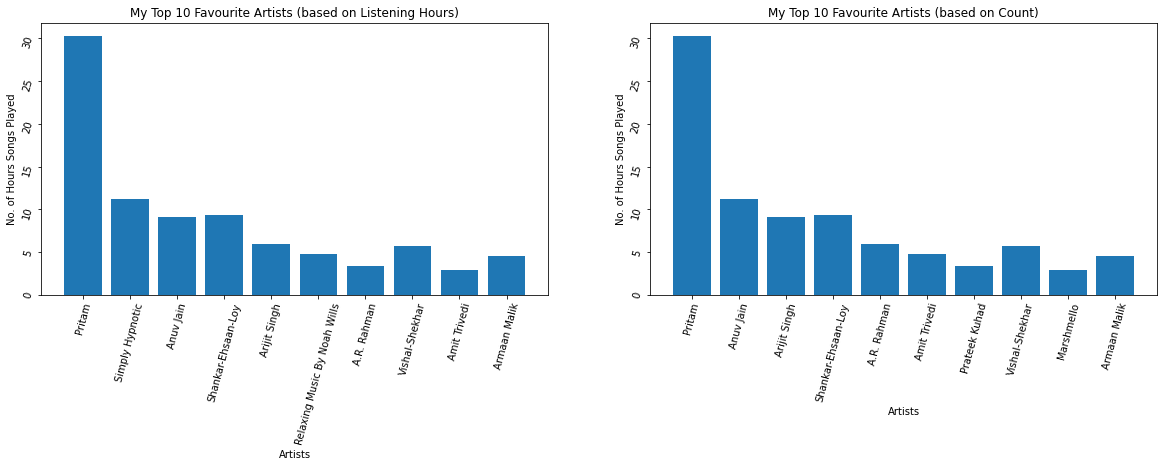

In [544]:
Top_Artist_By_Time = df.groupby(["artistName"])[["Listening Hours","Count"]].sum().sort_values(by="Listening Hours", ascending=False)
Top_Artist_By_Count = df.groupby(["artistName"])[["Listening Hours","Count"]].sum().sort_values(by="Count", ascending=False)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(Top_Artist_By_Time.head(10).index,Top_Artist["Listening Hours"].head(10))
ax1.set(title="My Top 10 Favourite Artists (based on Listening Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);

ax2.bar(Top_Artist_By_Count.head(10).index,Top_Artist["Listening Hours"].head(10))
ax2.set(title="My Top 10 Favourite Artists (based on Count)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax2.tick_params(labelrotation=75);

### Plot Top 10 Favourite Songs based on the Listening Hours and No. of Times

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127911 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127911 missing from current font.
  font.set_text(s, 0, flags=flags)


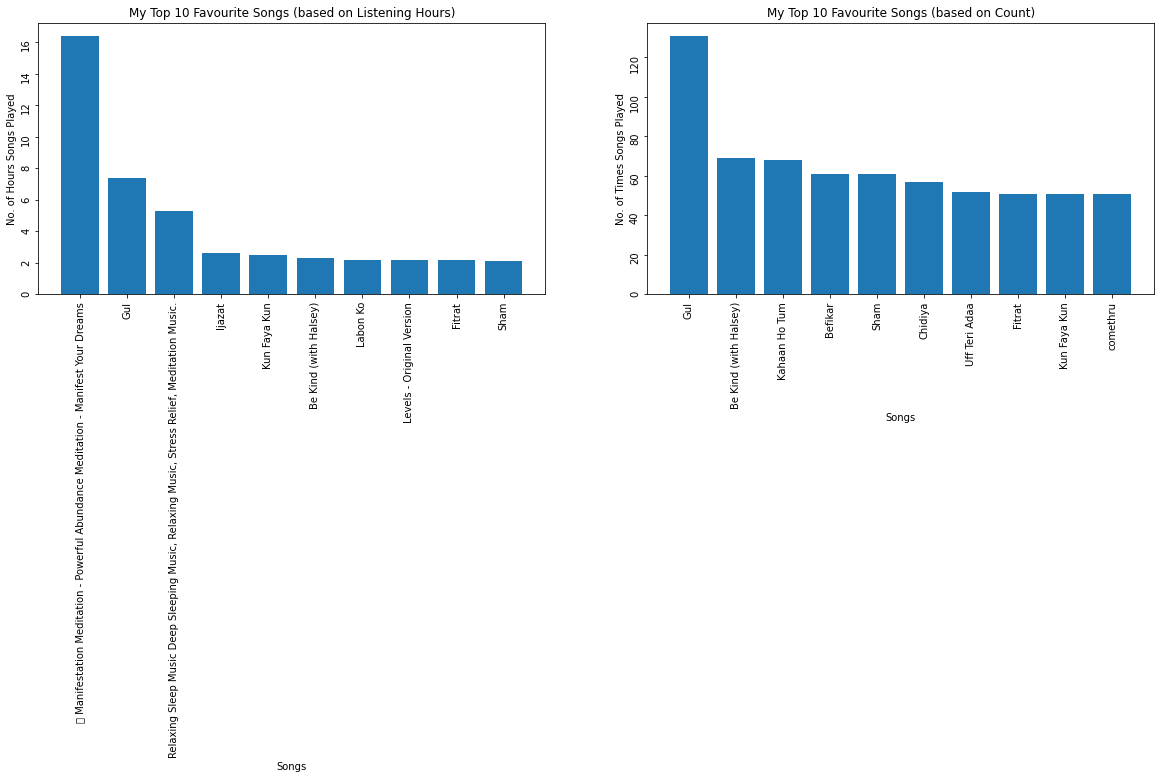

In [545]:
Top_Songs_By_Time = df.groupby(["trackName"])[["Listening Hours","Count"]].sum().sort_values(by="Listening Hours", ascending=False)
Top_Songs_By_Count = df.groupby(["trackName"])[["Listening Hours","Count"]].sum().sort_values(by="Count", ascending=False)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.bar(Top_Songs_By_Time.head(10).index,Top_Songs_By_Time["Listening Hours"].head(10))
ax1.set(title="My Top 10 Favourite Songs (based on Listening Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);

ax2.bar(Top_Songs_By_Count.head(10).index,Top_Songs_By_Count["Count"].head(10))
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);

### Plot a Pie Chart to show the Day Wise Percentage of Streaming

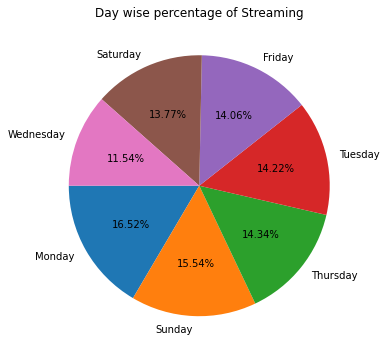

In [546]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(df["day_name"].value_counts(), labels = df["day_name"].value_counts().index, autopct='%.2f%%', startangle=180);
ax.set(title="Day wise percentage of Streaming");

### Plot a Histogram to Show the Average Distribution of Streaming Over Hours of the Day

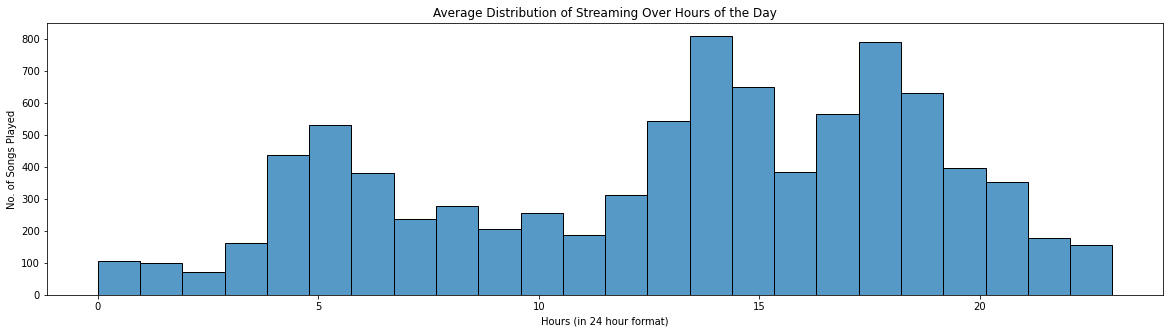

In [547]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set(title="Average Distribution of Streaming Over Hours of the Day", xlabel="Hours (in 24 hour format)", ylabel="No. of Songs Played")
sns.histplot(df["hour"], bins=24);

### Plot a Graph to Show the Average Spotify Usage over Months

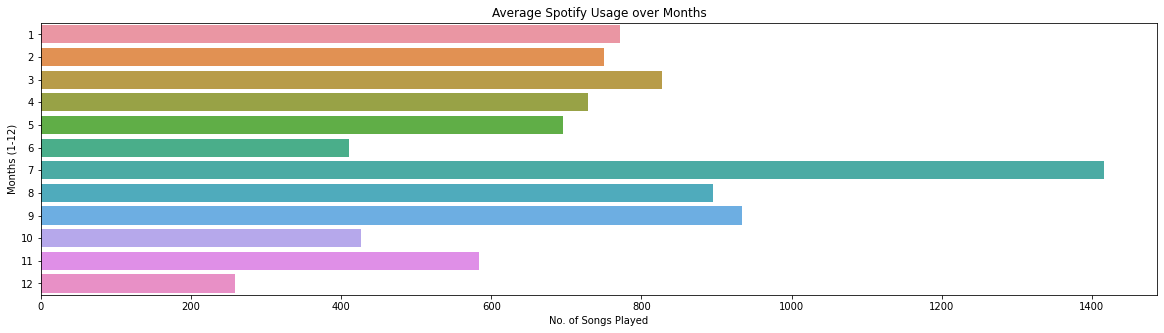

In [548]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(y=df["month"])
ax.set(title="Average Spotify Usage over Months", xlabel="No. of Songs Played", ylabel="Months (1-12)");

### Calculate the Total Hours Spent on Spotify

In [549]:
Spent_Hours = df["Listening Hours"].sum()
Spent_Hours

380.067

### Find the Date on Which Maximum Number of Songs Were Streamed

In [550]:
df["date"] = df["Stream_Time"].dt.date
Max_Listening = df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
Max_Listening.head(1)

,Count
date,
2021-02-28,177


### Plot a Scatterplot to Show the Maximum Number of Songs Played in a Day

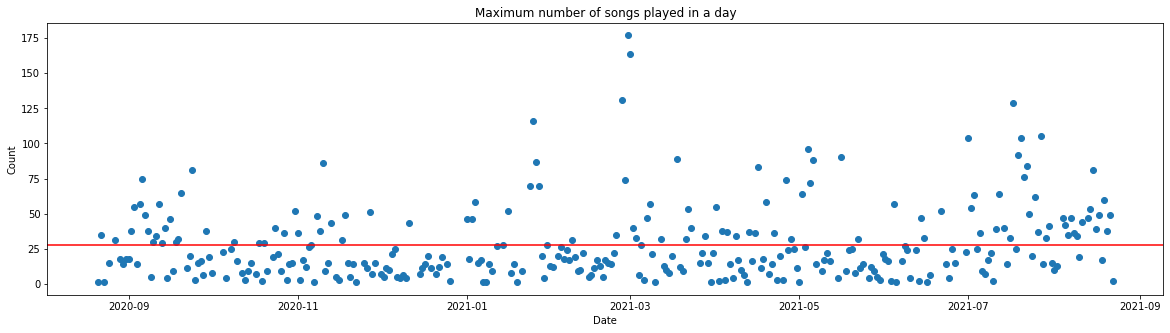

In [551]:
fig,ax = plt.subplots(figsize=(20,5))
ax.scatter(Max_Listening.index,Max_Listening["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(Max_Listening["Count"].mean(), linestyle="-", color="r");

### Plot a Graph to Show the Average Usage over Week

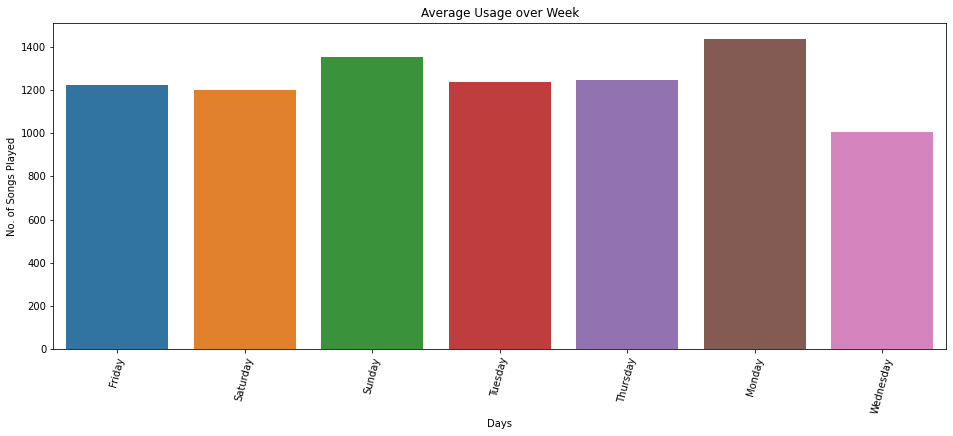

In [552]:
fig, ax = plt.subplots(figsize=(16,6))
ax = sns.countplot(x=df["day_name"])
plt.xticks(rotation=75);
ax.set(title="Average Usage over Week",xlabel="Days",ylabel="No. of Songs Played");

### Plot a Bar Graph to Show the Difference between Streaming on Weekday and on Weekend

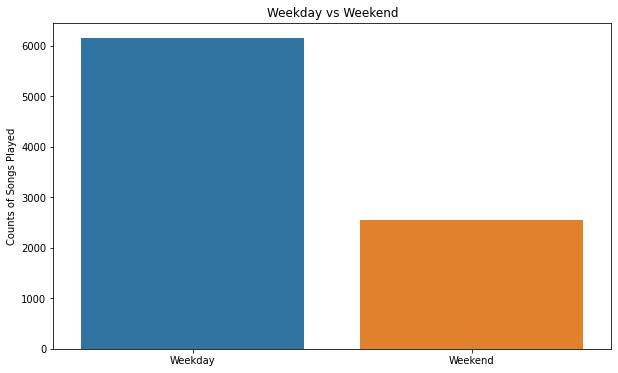

In [553]:
extra_df = df.copy()
extra_df['is_weekend'] = extra_df["day_name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100

fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(x=["Weekday","Weekend"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",ylabel="Counts of Songs Played");

## Conclusion (Aug 2020 - Aug 2021)

### 1. My Favourite Artist Whom I've Played Most is Pritam

### 2. My Favourite Song is Gul by Anuv Jain

### 3. I'm most active in Spotify on Mondays

### 4. My most active hours on Sptify ranges from 1 PM to 8 PM.

### 5. I played the most songs in July 2021

### 6. I have spent almost 380 hours streaming on spotify

### 7. On 28th February 2021, I Played the Maximum Number of Songs that is 390 Songs

### 8. I played 30 songs on average per day.

### 9. I have played songs of 949 Unique Artist which comprises 10.9% of total artists in my streaming history.

### 10. I have played 2189 Unique Songs which comprises 25.1% of total songs in my streaming history.